# Importation des modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D

# Exploration du dataset

In [2]:
images = pathlib.Path('PBC_dataset_normal_DIB')

In [3]:
img_height=360
img_width=360

train_data = tf.keras.preprocessing.image_dataset_from_directory(
                                            images, validation_split=0.2, subset='training', seed=123,
                                            image_size=(img_height, img_width))

Found 17092 files belonging to 8 classes.
Using 13674 files for training.


In [4]:
val_data= tf.keras.preprocessing.image_dataset_from_directory(images,
                                          validation_split=0.2,
                                          subset='validation',
                                         seed=123,
                                         image_size=(360,360))

Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


# VGG16 

In [11]:
model = tf.keras.models.load_model('fine_tuning.h5')

In [13]:
loss, acc = model.evaluate(val_data)

107/107 [==============================] - 1071s 10s/step - loss: 0.3603 - acc: 0.8754


In [36]:
y_true_test = np.concatenate([y for x,y in val_data])

In [38]:
y_pred = model.predict(val_data)
y_pred_class = y_pred.argmax(axis=1)

107/107 [==============================] - 991s 9s/step


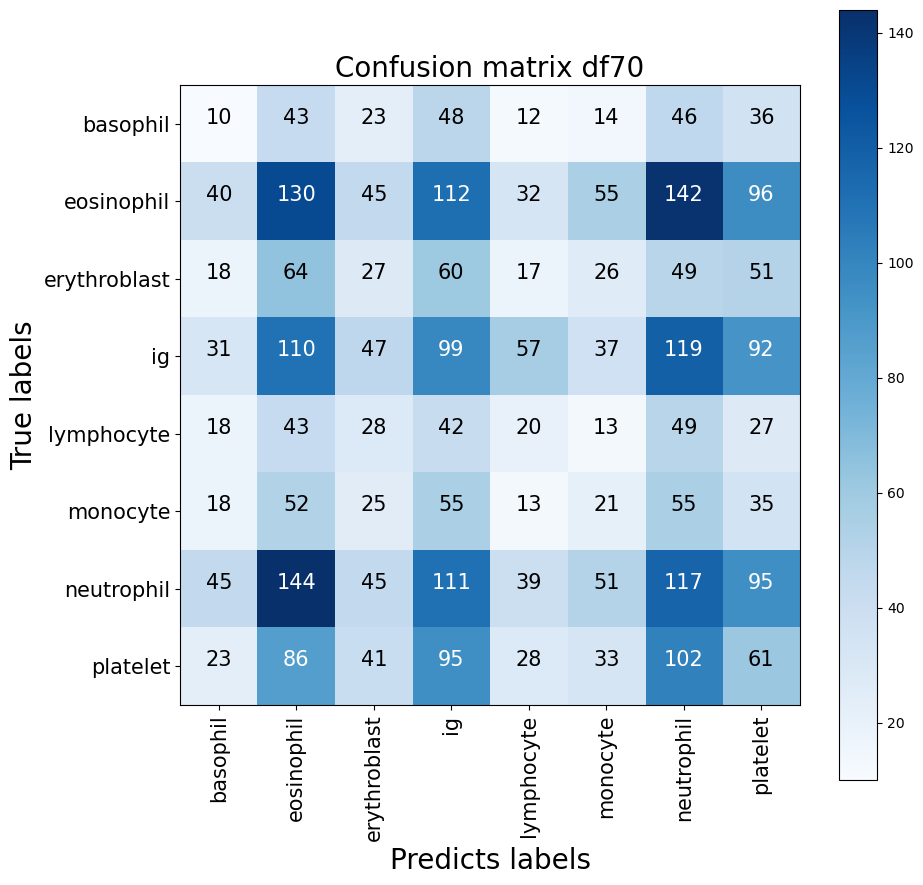

In [39]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

cnf_matrix = confusion_matrix(y_true_test, y_pred_class)

classes = train_data.class_names

plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70",fontsize=20)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation =90,fontsize=15)
plt.yticks(tick_marks, classes,fontsize=15)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black",
            fontsize=15)

plt.ylabel('True labels',fontsize=20)
plt.xlabel('Predicts labels',fontsize=20)
plt.show()